In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/d/zainabe/heart-disease/heart_disease.csv")

In [3]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

#### The "None" label, which indicates that the person had never consumed Alcohol is read by Python as NAN value. Adding that the most common value is the "None" value. So I used fillna with Never as it is the mode.

In [5]:
df['Alcohol Consumption'] = df['Alcohol Consumption'].fillna("Never")

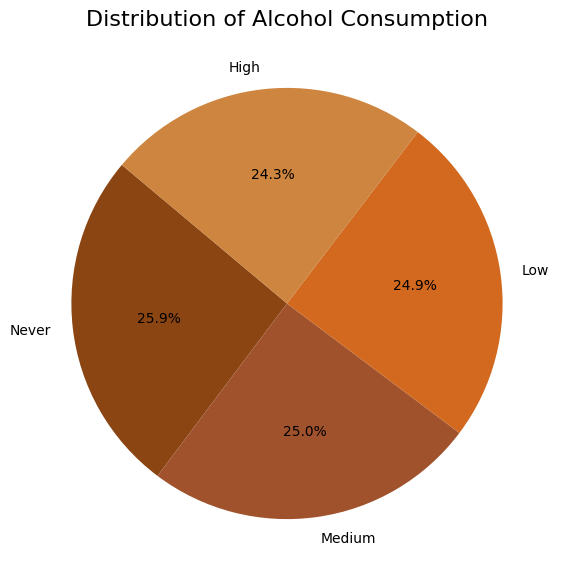

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate value counts
value_counts = df['Alcohol Consumption'].value_counts()

# Define a custom brown color palette
brown_palette = ["#8B4513", "#A0522D", "#D2691E", "#CD853F", "#F4A460"]  # Shades of brown

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=brown_palette)

# Add title
plt.title("Distribution of Alcohol Consumption", fontsize=16)

# Show the plot
plt.show()

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9532.0,49.325850,18.205866,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,9532.0,149.793433,17.578752,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,9532.0,225.288397,43.624616,150.000000,187.000000,225.000000,263.000000,300.000000
BMI,9532.0,29.057661,6.293722,18.007058,23.656482,29.056969,34.477519,39.996954
Sleep Hours,9532.0,6.989240,1.752605,4.000605,5.449181,7.000719,8.532454,9.999952
Triglyceride Level,9532.0,250.388166,87.127237,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,9532.0,120.099350,23.604012,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,9532.0,7.462227,4.343354,0.003647,3.662392,7.458804,11.236785,14.997087
Homocysteine Level,9532.0,12.448643,4.318686,5.000236,8.723334,12.398044,16.129292,19.999037


In [11]:
df_num = df.select_dtypes(include=['number'])
df_num

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
1,69.0,146.0,286.0,25.221799,8.744034,133.0,157.0,9.355389,19.298875
2,46.0,126.0,216.0,29.855447,4.440440,393.0,92.0,12.709873,11.230926
3,32.0,122.0,293.0,24.130477,5.249405,293.0,94.0,12.509046,5.961958
4,60.0,166.0,242.0,20.486289,7.030971,263.0,154.0,10.381259,8.153887
5,25.0,152.0,257.0,28.144681,5.504876,126.0,91.0,4.297575,10.815983
...,...,...,...,...,...,...,...,...,...
9995,25.0,136.0,243.0,18.788791,6.834954,343.0,133.0,3.588814,19.132004
9996,38.0,172.0,154.0,31.856801,8.247784,377.0,83.0,2.658267,9.715709
9997,73.0,152.0,201.0,26.899911,4.436762,248.0,88.0,4.408867,9.492429
9998,23.0,142.0,299.0,34.964026,8.526329,113.0,153.0,7.215634,11.873486


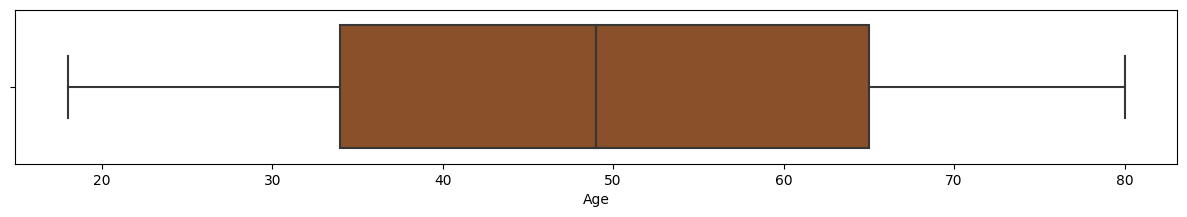

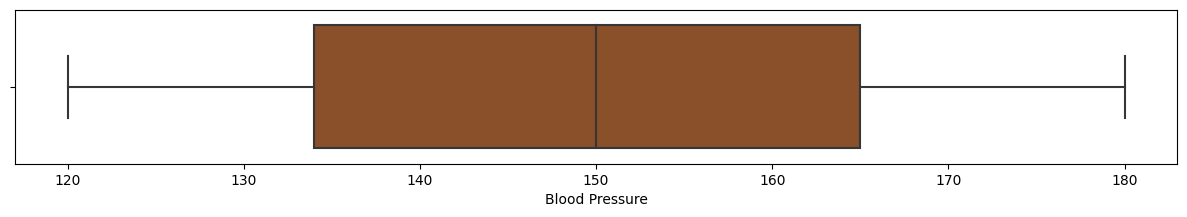

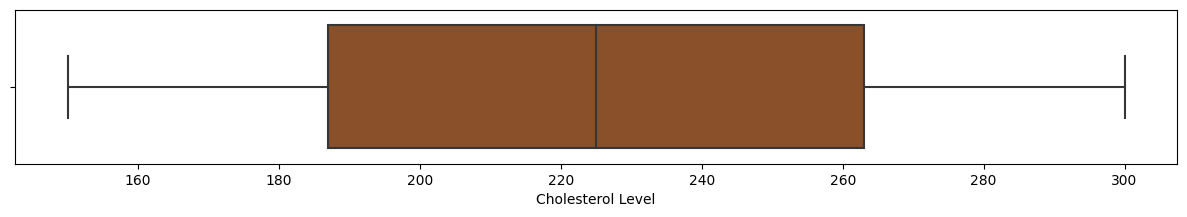

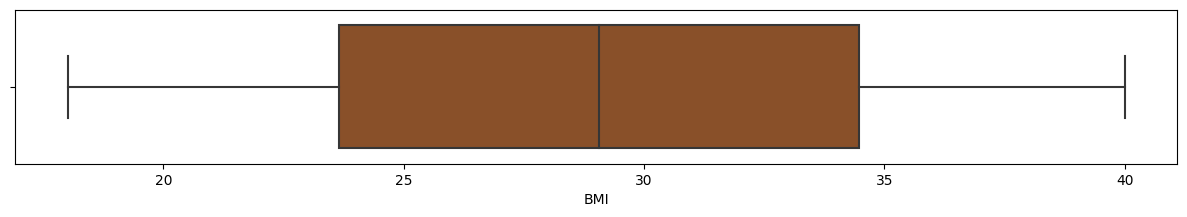

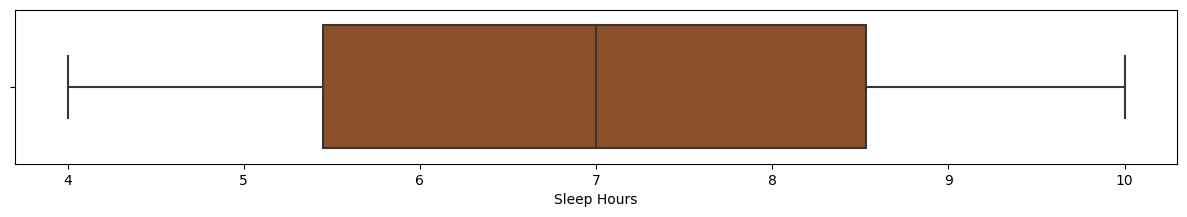

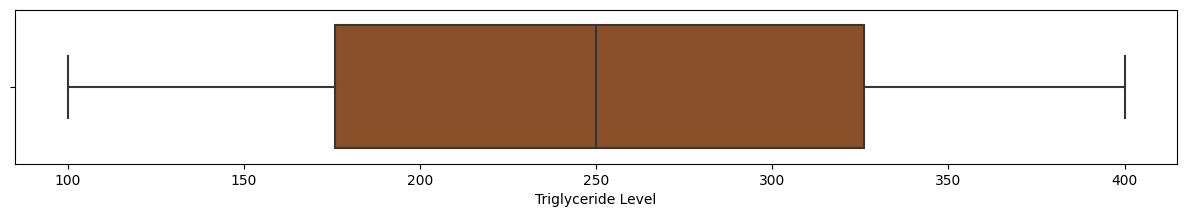

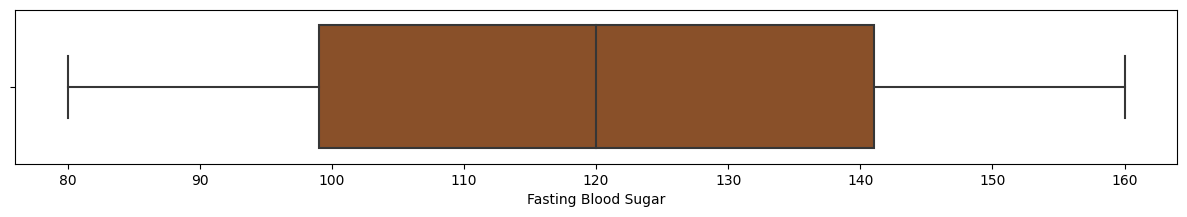

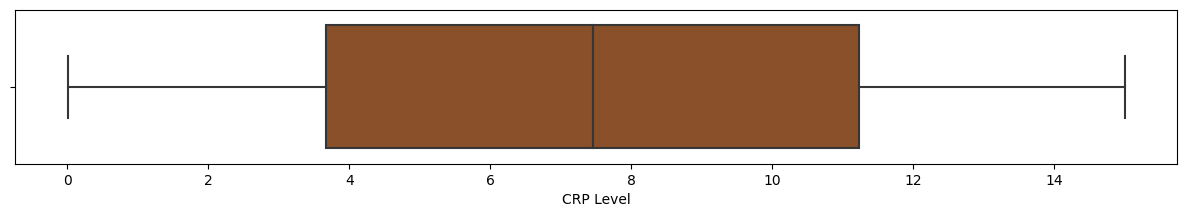

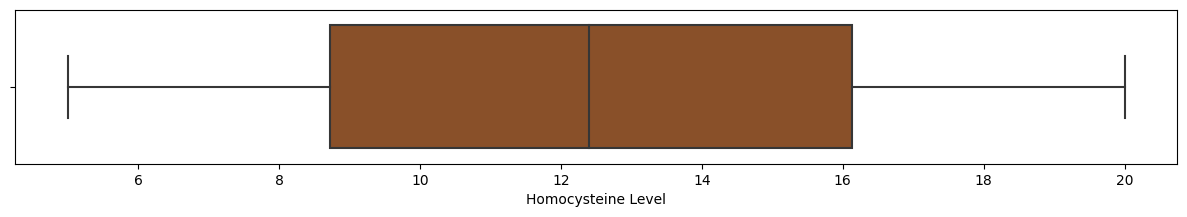

In [12]:
for column in df_num:
    plt.figure(figsize=(15,2))
    sns.boxplot(x=df[column], color=(0.6, 0.3, 0.1))

In [13]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Exercise Habits'] = df['Exercise Habits'].map({'High':2,'Medium': 1, 'Low': 0})
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['Family Heart Disease'] = df['Family Heart Disease'].map({'Yes': 1, 'No': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
df['High Blood Pressure'] = df['High Blood Pressure'].map({'Yes': 1, 'No': 0})
df['Low HDL Cholesterol'] = df['Low HDL Cholesterol'].map({'Yes': 1, 'No': 0})
df['High LDL Cholesterol'] = df['High LDL Cholesterol'].map({'Yes': 1, 'No': 0})
df['Alcohol Consumption'] = df['Alcohol Consumption'].map({'High': 3, 'Medium': 2, 'Low': 1, 'Never': 0})
df['Stress Level'] = df['Stress Level'].map({'High': 2, 'Medium': 1, 'Low': 0})
df['Sugar Consumption'] = df['Sugar Consumption'].map({'High': 2, 'Medium': 1, 'Low': 0})
df['Heart Disease Status'] = df['Heart Disease Status'].map({'Yes': 1, 'No': 0})

In [14]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1,69.0,0,146.0,286.0,2,0,1,1,25.221799,0,...,0,2,2,8.744034,1,133.0,157.0,9.355389,19.298875,0
2,46.0,1,126.0,216.0,0,0,0,0,29.855447,0,...,1,1,0,4.440440,0,393.0,92.0,12.709873,11.230926,0
3,32.0,0,122.0,293.0,2,1,1,0,24.130477,1,...,1,1,2,5.249405,2,293.0,94.0,12.509046,5.961958,0
4,60.0,1,166.0,242.0,0,1,1,1,20.486289,1,...,0,1,2,7.030971,2,263.0,154.0,10.381259,8.153887,0
5,25.0,1,152.0,257.0,0,1,0,0,28.144681,0,...,0,1,1,5.504876,0,126.0,91.0,4.297575,10.815983,0


<Axes: >

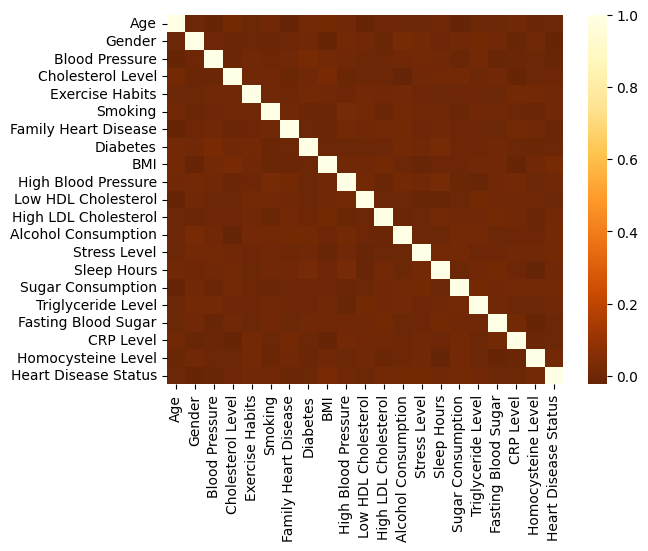

In [15]:
sns.heatmap(df.corr(), cmap='YlOrBr_r')

In [16]:
X = df.drop(columns='Heart Disease Status')
y = df['Heart Disease Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Train a k-NN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Evaluate
knn_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

Accuracy: 0.7682223387519664
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      1528
           1       0.24      0.07      0.11       379

    accuracy                           0.77      1907
   macro avg       0.52      0.51      0.49      1907
weighted avg       0.69      0.77      0.72      1907



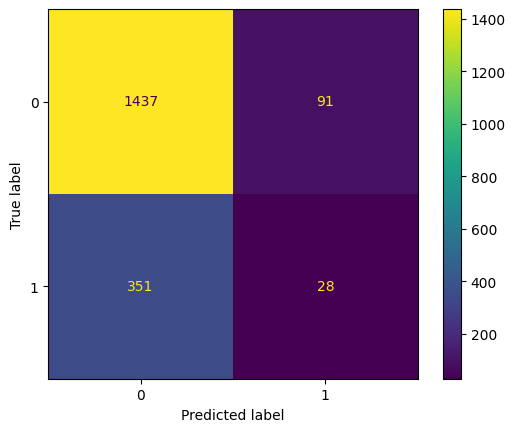

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusion_matrix(y_test, knn_pred)
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred)
plt.show()

## SVM

In [58]:
from sklearn.svm import SVC

# Train an SVM model
model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
model.fit(X_train, y_train)

# Evaluate
svm_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

Accuracy: 0.8012585212375459
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1528
           1       0.00      0.00      0.00       379

    accuracy                           0.80      1907
   macro avg       0.40      0.50      0.44      1907
weighted avg       0.64      0.80      0.71      1907



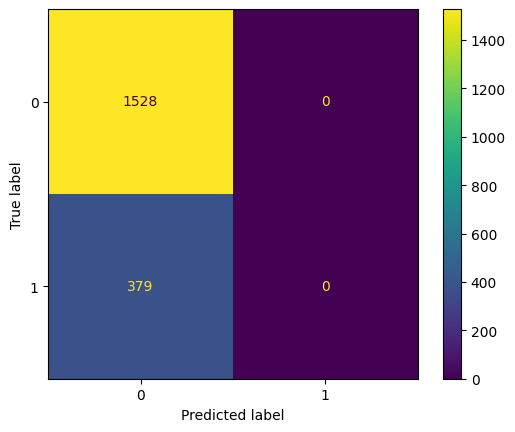

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusion_matrix(y_test, svm_pred)
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred)
plt.show()

## Tree-Based Models

In [61]:
from xgboost import XGBClassifier

# Train an XGBoost model
model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate
XG_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, XG_pred))
print("Classification Report:\n", classification_report(y_test, XG_pred))

Accuracy: 0.800209753539591
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1528
           1       0.33      0.01      0.01       379

    accuracy                           0.80      1907
   macro avg       0.57      0.50      0.45      1907
weighted avg       0.71      0.80      0.71      1907



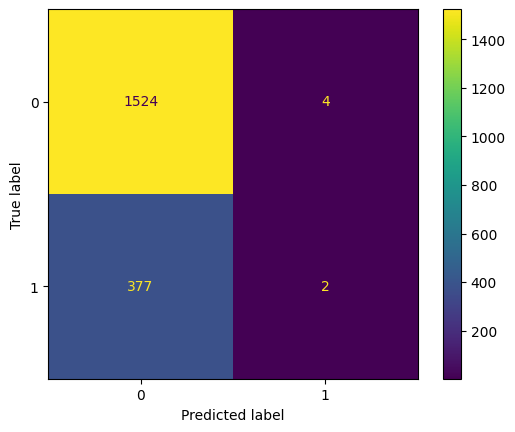

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusion_matrix(y_test, XG_pred)
ConfusionMatrixDisplay.from_predictions(y_test, XG_pred)
plt.show()

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
RF_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, RF_pred))
print("Classification Report:\n", classification_report(y_test, RF_pred))

Accuracy: 0.8012585212375459
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1528
           1       0.00      0.00      0.00       379

    accuracy                           0.80      1907
   macro avg       0.40      0.50      0.44      1907
weighted avg       0.64      0.80      0.71      1907



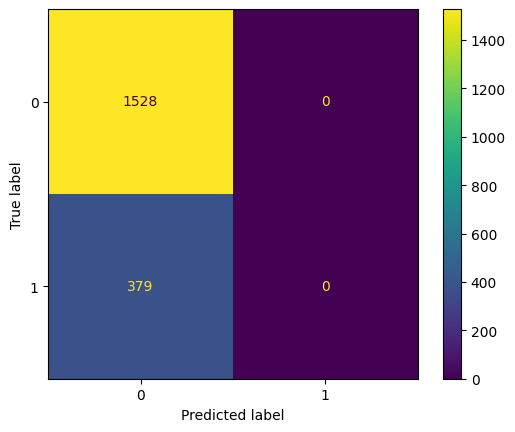

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusion_matrix(y_test, RF_pred)
ConfusionMatrixDisplay.from_predictions(y_test, RF_pred)
plt.show()